In [65]:
from sklearn import  datasets
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data that contains 4 features of 150 samples.

In [67]:
iris = datasets.load_iris()
iris_ = pd.DataFrame(iris.data)
iris_.columns = iris.feature_names
iris_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Problem 1: 
Write a program such that different training variables such as "mxdepth" for DecisionTreeClassifier and "k" for KNN classifier can have consecutive values being experimented. For example, rewrite the following code so that mxdepth starts from 1 to 10 or k goes from 1 to 10. You will need to plot the accuracy per varying these parameters of each classifier with your analysis in words.

Data that contains 4 features and labels with ground truth information.

In [68]:
X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

The training variables such as "mxdepth" for DecisionTreeClassifier.

In [69]:
mxdepth = 1
classifier1 = DecisionTreeClassifier(max_depth=mxdepth)
classifier1.fit(x_train,y_train)
predictions=classifier1.predict(x_test)
print(f"DTC ({mxdepth}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

DTC (1) = 0.58 accuracy


The training variables such as "k" for KNN classifier

In [70]:
k = 1
classifier2 = KNeighborsClassifier(n_neighbors=k)
classifier2.fit(x_train,y_train)
predictions=classifier2.predict(x_test)
print(f"KNN ({k}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

KNN (1) = 0.97 accuracy


List of values to try for max_depth and list to store the accuracy for each value of max_depth.

In [71]:
max_depth = list(range(1, 11))

accuracy = []

for depth in max_depth:    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train, y_train)
    classifier1 = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    classifier1.fit(x_train,y_train)
    predictions=classifier1.predict(x_test)
    
    score = classifier1.score(x_test, y_test)
    accuracy.append(accuracy_score(y_test, predictions))

    score = clf.score(x_test, y_test)
    accuracy.append(score)
print(accuracy)

[0.5789473684210527, 0.5789473684210527, 0.8947368421052632, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


Try K=1 through K=10 and record testing accuracy

In [72]:
k_range = list(range(1, 11))

scores = {}

for k in k_range:
    classifier2 = KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(x_train,y_train)
    predictions=classifier2.predict(x_test)
    scores[k] = accuracy_score(y_test,predictions)
    
print(scores)

{1: 0.9736842105263158, 2: 0.9736842105263158, 3: 0.9736842105263158, 4: 0.9736842105263158, 5: 0.9736842105263158, 6: 0.9736842105263158, 7: 0.9736842105263158, 8: 0.9736842105263158, 9: 0.9736842105263158, 10: 0.9736842105263158}


Problem 2: 
The data contains 4 different features namely - sepal length, sepal width, petal length, and petal width. It is important to recognize which feature set(s) performs the best. Choose the best combination based on your experiment. You will have 10 different combinations possible e.g. {SL, SW, PL, PW, (SL,SW), (SL, PL)...(SL, SW, PL, PW)}.You will show different performance after based on the best training parameters from Problem #1. This may show that the more number of features doesn't end up with better accuracy necessarily. You will have the performance results per 10 combinations and plot the results on a graph for each classifier with your analysis in words.

In [73]:
x=iris.data   # data that contains 4 features of 150 samples. 
y=iris.target # labels with ground truth information

# split the data into split% training and (100-split)% testing
split = 0.9

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.9, random_state=3)

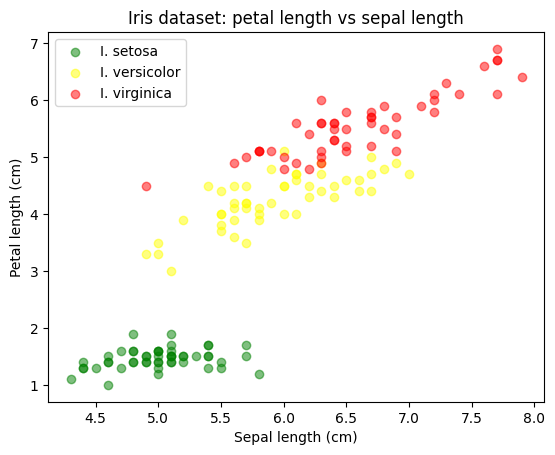

In [74]:
df = pd.read_csv('Iris.csv')
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

colors = ['green', 'yellow', 'red']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colors[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='upper left')

plt.show()

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

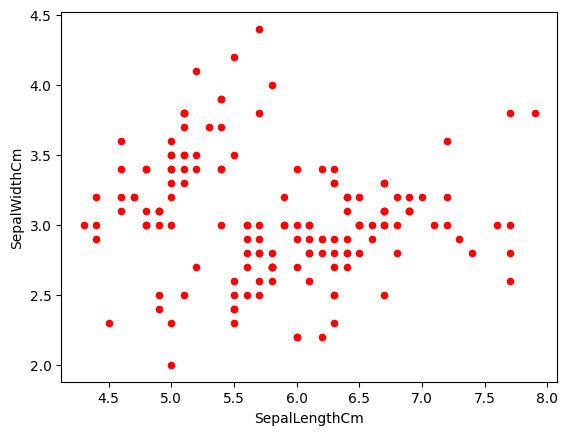

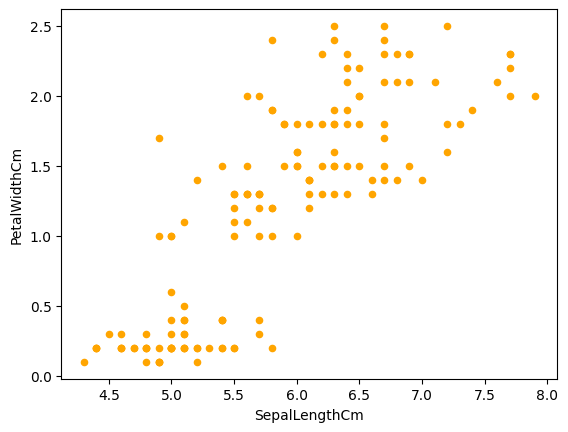

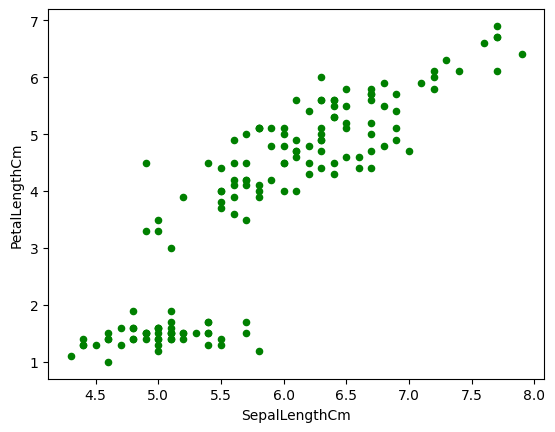

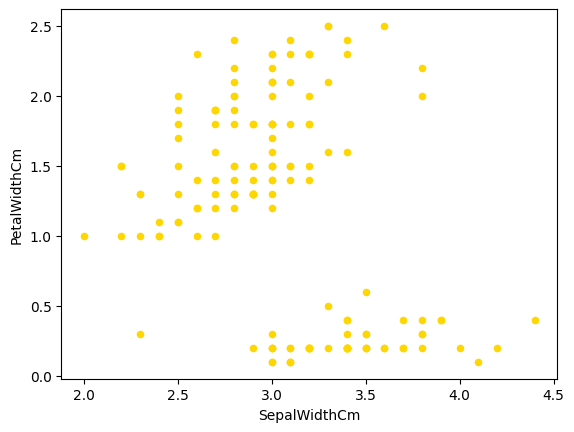

In [75]:
iris = pd.read_csv("Iris.csv") 
 
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color='red')
iris.plot(kind="scatter", x="SepalLengthCm", y="PetalWidthCm", color='orange')
iris.plot(kind="scatter", x="SepalLengthCm", y="PetalLengthCm", color='green')
iris.plot(kind="scatter", x="SepalWidthCm", y="PetalWidthCm", color='gold')

<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

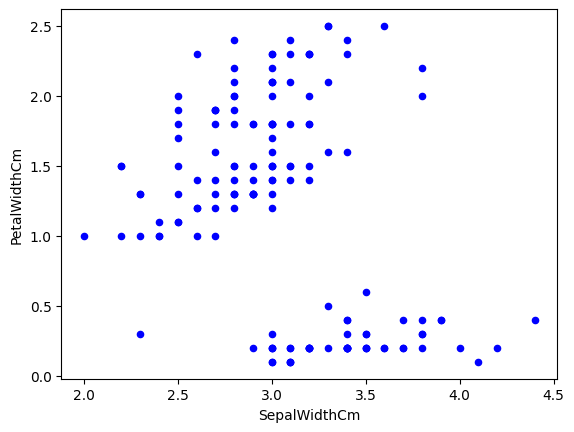

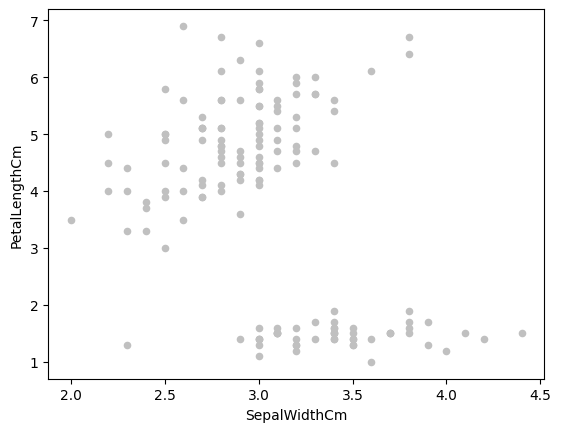

In [76]:
iris.plot(kind="scatter", x="SepalWidthCm", y="PetalWidthCm", color='blue')
iris.plot(kind="scatter", x="SepalWidthCm", y="PetalLengthCm", color='silver')

<Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

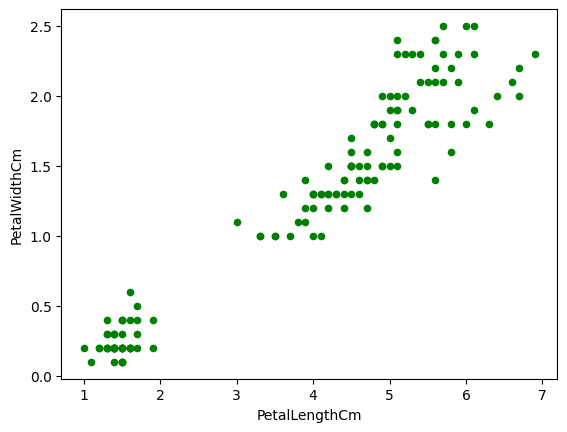

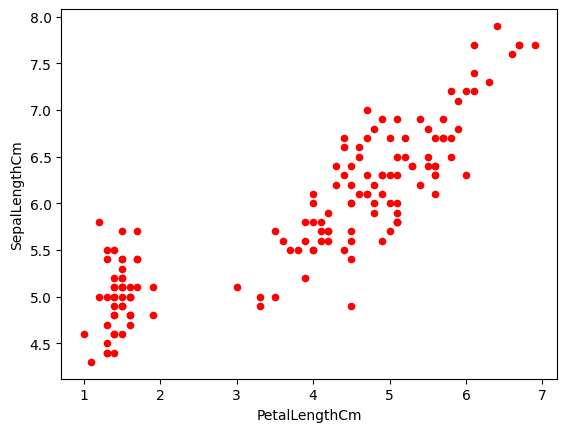

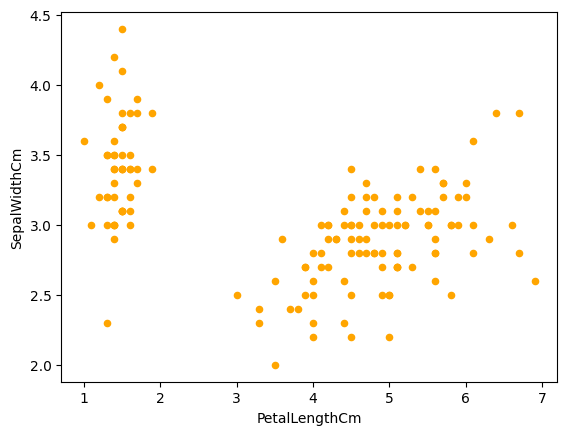

In [77]:
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color='green')
iris.plot(kind="scatter", x="PetalLengthCm", y="SepalLengthCm", color='red')
iris.plot(kind="scatter", x="PetalLengthCm", y="SepalWidthCm", color='orange')

<Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

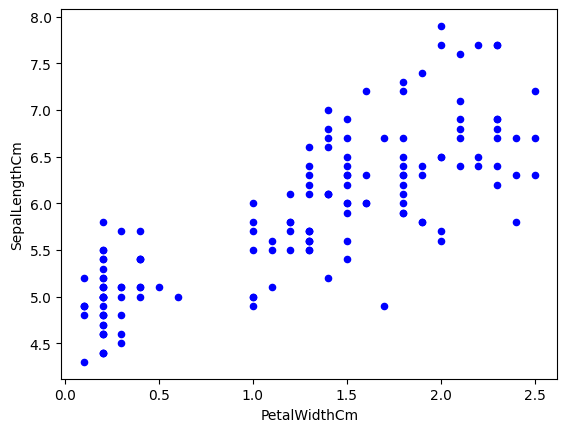

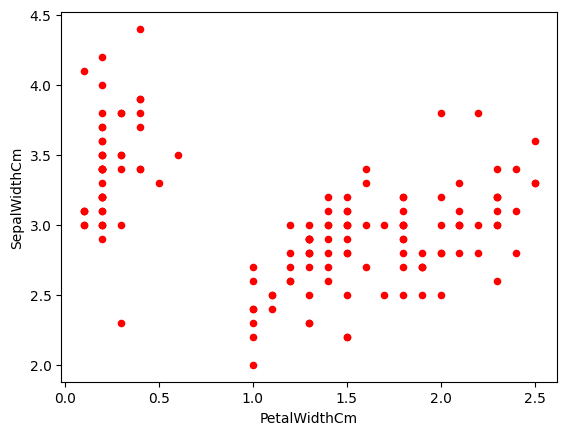

In [78]:
iris.plot(kind="scatter", x="PetalWidthCm", y="SepalLengthCm", color='blue')
iris.plot(kind="scatter", x="PetalWidthCm", y="SepalWidthCm", color='red')

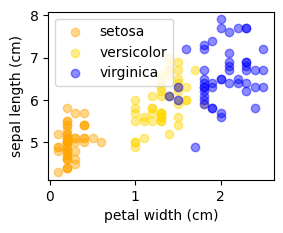

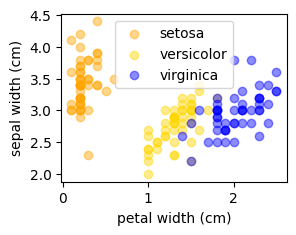

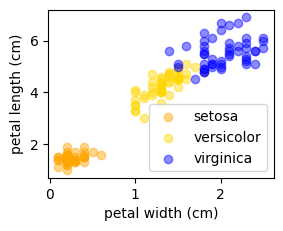

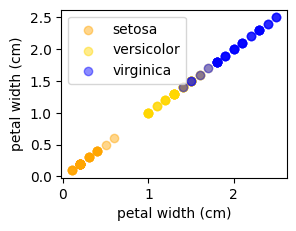

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris() 
colors = ['orange', 'gold', 'blue']

feature_x= 3 
for feature_y in range(iris.data.shape[1]):
    plt.subplot(2, 2, feature_y+1) 
    for label, color in zip(range(len(iris.target_names)), colors):
        
        plt.scatter(iris.data[iris.target==label, feature_x],
                    iris.data[iris.target==label, feature_y],
                    label=iris.target_names[label],
                    alpha = 0.45, # transparency
                    color=color)
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.legend()
    plt.show()

Problem 3: 
Once you decide the best feature set(s) from the Problem #2, it is important to recognize how the size of training set versus testing set (or ratio between sets) would influence the overall representative performance. You will have the performance results per 10%, 20% ... 90% and plot the results on a graph for each classifier with your analysis in words.

The performance result of 10%.

In [92]:
split1 = 0.1

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(135,)
(15,)


The performance result of 20%.

In [83]:
split2 = 0.2

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(120,)
(30,)


The performance result of 30%.

In [93]:
split3 = 0.3

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(105,)
(45,)


The performance result of 40%.

In [94]:
split3 = 0.4

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(90,)
(60,)


The performance result of 50%.

In [95]:
split3 = 0.5

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(75,)
(75,)


The performance result of 60%.

In [97]:
split3 = 0.6

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(60,)
(90,)


The performance result of 70%.

In [98]:
split3 = 0.7

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(45,)
(105,)


The performance result of 80%.

In [100]:
split3 = 0.8

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(30,)
(120,)


The performance result of 90%.

In [102]:
split3 = 0.9

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(15,)
(135,)
